# Assignment

In this lesson you were shown how to build a model using both Linear and Polynomial Regression. Using this knowledge, find a dataset or use one of Scikit-learn's built-in sets to build a fresh model. Explain in your notebook why you chose the technique you did, and demonstrate your model's accuracy. If it is not accurate, explain why.


In [44]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [112]:
file = "/home/filippo/repositories/statistics/datasets/autompg.csv"
autompg = pd.read_csv(file, header=0)
autompg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [113]:
autompg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [114]:
autompg['origin'].unique()

array([1, 3, 2])

In [115]:
autompg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [116]:
autompg[['horsepower']] = autompg[['horsepower']].apply(pd.to_numeric, errors='coerce')

In [117]:
autompg.dropna(inplace=True)

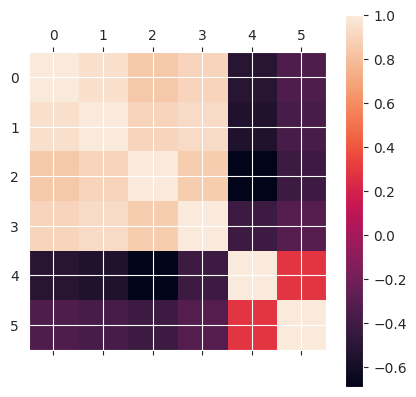

In [118]:
plt.matshow(autompg[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']].corr())
plt.colorbar()
plt.show()


`mpg` is the target variable, the others are used as features. Some are transformed into dummy variables.


In [119]:
X = pd.get_dummies(autompg['origin']) \
    .join(autompg['cylinders']) \
    .join(autompg['displacement']) \
    .join(autompg['horsepower']) \
    .join(autompg['weight']) \
    .join(autompg['acceleration']) \
    .join(autompg['model year']) 

y = autompg[('mpg')]

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [121]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [122]:
pred = model.predict(X_test)

In [123]:
mse = np.sqrt(mean_squared_error(y_test, pred))
score = model.score(X_test, y_test)

print('Mean squared error: ', mse/np.mean(pred))
print('Model determination: ', score)

Mean squared error:  0.13753986132626345
Model determination:  0.8387519287083165
